In [1]:
import sys
import numpy as np
import pandas as pd
import warnings
import ta
import MetaTrader5 as mt5
mt5.initialize()
from operativa import *
from AE_crossfunctions import crossfunctions as cf
warnings.filterwarnings("ignore")


In [2]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

In [3]:
# indice USA
SP500 = MT5.get_data('SPX500',10000)
# Indice España
IBEX35 = MT5.get_data('SPA35',10000)
# Indice Europa
EUSTOXX50 = MT5.get_data('STOXX50E',10000)

In [4]:
SP500.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2008-08-07,1286.5,1286.5,1264.3,1266.1,241,0,0
2008-08-08,1266.3,1297.9,1262.1,1296.3,417,0,0
2008-08-11,1294.4,1313.2,1291.4,1305.3,328,0,0
2008-08-12,1304.8,1304.8,1285.6,1289.6,233,0,0
2008-08-13,1288.6,1294.0,1274.9,1285.8,355,0,0


In [5]:
print(SP500.shape)
print(IBEX35.shape)
print(EUSTOXX50.shape)

(3949, 7)
(3871, 7)
(2705, 7)


campos con valores nulos:

In [6]:
SP500.isnull().sum()

open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64

In [7]:
IBEX35.isnull().sum()

open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64

In [8]:
EUSTOXX50.isnull().sum()

open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64

Observamos que la API con la que estamos trabajando parece fiable, pues no tenemos valores NAN

# Estadística descriptiva

Construimos un dataframe con la variación diaria de cada indice

In [9]:
SP500_pct_return = SP500['close'].pct_change(1)
SP500_pct_return.name = 'SP500'
IBEX35_pct_return = IBEX35['close'].pct_change(1)
IBEX35_pct_return.name = 'IBEX35'
EUSTOXX50_pct_return = EUSTOXX50['close'].pct_change(1)
EUSTOXX50_pct_return.name = 'EUR50'

returns = pd.concat((SP500_pct_return, IBEX35_pct_return, EUSTOXX50_pct_return),axis=1).dropna()
returns

,SP500,IBEX35,EUR50
time,,,
2012-08-31,0.006796,0.027207,0.010361
2012-09-03,0.004064,0.001892,0.010664
2012-09-04,-0.002841,0.010116,-0.007711
2012-09-05,0.000641,-0.000668,-0.003681
2012-09-06,0.019502,0.046499,0.036535
...,...,...,...
2023-03-31,0.014470,0.003205,0.008451
2023-04-03,0.003208,-0.007407,-0.000623
2023-04-04,-0.004917,0.002542,-0.001086


In [10]:
date = returns.index.to_numpy()
print('la fecha más antigüa es: ',date.min())
print('la fecha más reciente es: ',date.max())

la fecha más antigüa es:  2012-08-31T00:00:00.000000000
la fecha más reciente es:  2023-04-06T00:00:00.000000000


Calculemos el retrono medio de los 3 indices anteriores. Primero calculamos el retorno media diario para luego, aplicando el numero medio de días en el que el mercado está abierto calcular el retorno medio mensual y anual

In [11]:
for asset in returns.columns:
    print(asset)
    mean_daily = np.mean(returns[asset], axis=0)*100
    mean_monthly = mean_daily * 21
    mean_yearly = mean_daily * 252
    print(f"Media Diaria: {'%.2f' % mean_daily} %")
    print(f"Media Mensual: {'%.2f' % mean_monthly} % ")
    print(f"Media Anual: {'%.2f' % mean_yearly} % \n")

SP500
Media Diaria: 0.05 %
Media Mensual: 1.02 % 
Media Anual: 12.24 % 

IBEX35
Media Diaria: 0.02 %
Media Mensual: 0.40 % 
Media Anual: 4.76 % 

EUR50
Media Diaria: 0.03 %
Media Mensual: 0.61 % 
Media Anual: 7.27 % 



Calculamos la **mediana** de los retornos diarios, mensuales y anuales

In [12]:
# -------- Mediana ------------
for asset in returns:
    print(asset)
    median_daily = np.median(returns[asset], axis=0)*100
    median_monthly = median_daily *21
    median_yearly = median_daily * 252 
    print(f"Mediana Diaria: {'%.2f' % median_daily} %")
    print(f"Monthly Median: {'%.2f' % median_monthly} %")
    print(f"Mediana Anual: {'%.2f' % median_yearly} % \n")

SP500
Mediana Diaria: 0.07 %
Monthly Median: 1.48 %
Mediana Anual: 17.71 % 

IBEX35
Mediana Diaria: 0.05 %
Monthly Median: 1.04 %
Mediana Anual: 12.50 % 

EUR50
Mediana Diaria: 0.07 %
Monthly Median: 1.54 %
Mediana Anual: 18.44 % 



Calculamos la **desviación típica** pare medir la volatilidad de cada activo

In [13]:
# -------- Desviación Estándar ------------
for asset in returns:
    print(asset)
    std_daily = np.std(returns[asset], axis=0)*100
    std_monthly = std_daily * np.sqrt(21)
    std_yearly = std_daily * np.sqrt(252) 
    print(f"Volatilidad Diaria: {'%.2f' % std_daily} %")
    print(f"Volatilidad Mensual: {'%.2f' % std_monthly} %")
    print(f"Volatilidad Anual: {'%.2f' % std_yearly} % \n")

SP500
Volatilidad Diaria: 1.08 %
Volatilidad Mensual: 4.93 %
Volatilidad Anual: 17.09 % 

IBEX35
Volatilidad Diaria: 1.31 %
Volatilidad Mensual: 5.98 %
Volatilidad Anual: 20.72 % 

EUR50
Volatilidad Diaria: 1.27 %
Volatilidad Mensual: 5.84 %
Volatilidad Anual: 20.24 % 



In [14]:
from scipy.stats import skew, kurtosis

In [15]:
# -------- Sesgo ------------
for asset in returns:
    print(asset)
    skw = skew(returns[asset], axis=0)
    print(f"Sesgo: {'%.2f' % skw} \n")

SP500
Sesgo: -0.37 

IBEX35
Sesgo: -0.91 

EUR50
Sesgo: -0.99 



In [16]:
# -------- Curtosis ------------
for asset in returns:
    print(asset)
    kurto = kurtosis(returns[asset], axis=0)
    print(f"Curtosis: {'%.2f' % kurto} \n")

SP500
Curtosis: 14.26 

IBEX35
Curtosis: 11.38 

EUR50
Curtosis: 12.68 



De la matriz de correlación podemos deducir dos cosas:
- que el indice de un país p.ej. IBEX35 para españa está muy correlacionado con el indice de su región EUR50 para europa.
- que los indices mundiales están correlacionados como es el caso de SP500 para EEUU y EUR50 para europa.

hemos comparado pocos indices para confirmar este hecho con rotundidad, pero lo asumiremos como válido porque es un hecho conocido en teoría económica, los mercados están sincronizados y cuando hay una crisis todos los mercados son bajistas y vicerversa.


In [17]:
returns.corr()

,SP500,IBEX35,EUR50
SP500,1.000000,0.584479,0.813714
IBEX35,0.584479,1.000000,0.821447
EUR50,0.813714,0.821447,1.000000


# Probabilidad

¿Cuál es la probabilidad de que un indice suba un día cualquiera? ¿Y de que baje?

In [18]:
for asset in returns:
    print(asset)
    p_increase = len(returns[returns[asset] > 0]) / len(returns[asset])*100
    p_decrease = len(returns[returns[asset] < 0]) / len(returns[asset])*100
    p_cero = len(returns[returns[asset] == 0]) / len(returns[asset])*100
    p_total = p_increase + p_decrease + p_cero
    print(f"Probabilidad de subida: {'%.2f' % p_increase} ")
    print(f"Probabilidad de bajada: {'%.2f' % p_decrease} ")
    print(f"Probabilidad de no variación: {'%.2f' % p_cero} ")
    print(f"Probabilidad total: {'%.2f' % p_total} \n")

SP500
Probabilidad de subida: 55.44 
Probabilidad de bajada: 44.19 
Probabilidad de no variación: 0.37 
Probabilidad total: 100.00 

IBEX35
Probabilidad de subida: 52.11 
Probabilidad de bajada: 47.37 
Probabilidad de no variación: 0.52 
Probabilidad total: 100.00 

EUR50
Probabilidad de subida: 52.70 
Probabilidad de bajada: 46.52 
Probabilidad de no variación: 0.78 
Probabilidad total: 100.00 



El incremento acumulado es:  131.24146571662544


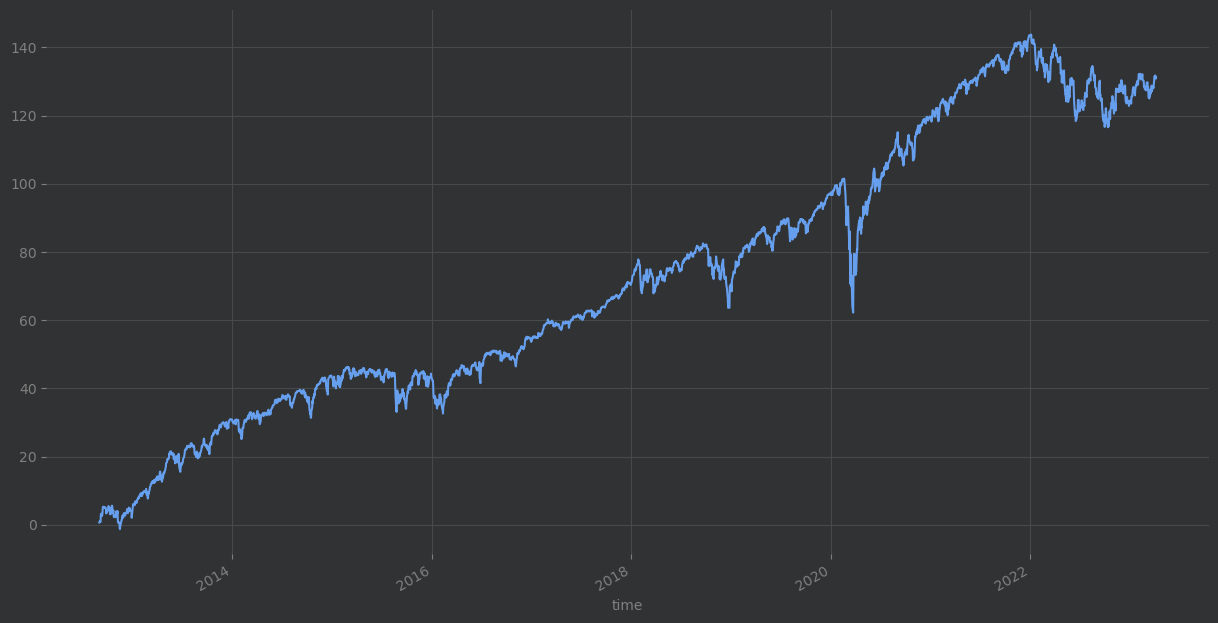

In [19]:
incremento_acum = returns['SP500']
#print(f"Incremento acumulado: {'%.2f' % incremento_acum} ")
returns['SP500'].mul(100).cumsum().plot(figsize=(15,8))
acum = returns['SP500'].mul(100).cumsum()
print('El incremento acumulado es: ',acum[-1])

## Tendencia
¿Cuál es la probabilidad de subida o bajada un día cualquiera cuando la tendencia del mercado es alcista? ¿y cuando es bajista?
Para medir la tendencia de un timeframe diario utilizaremos una media movil de 150 periodos, ya que así suavizamos la curva del precio eliminando mucho de su ruido. Cuando la media movil tenga pendiente positiva estaremos ante un mercado alcista y viceversa.

Para medir la tendencia del mercado utilizaremos el indice SP500 ya que es el más representativo con datos accesibles (si tuviéramos datos el más representativo sería el indice NYSE). Para medir la tendencia utilizamos un índice y no las acciones de una compañia en concreto porque la curva de precios de un índice es la composición del valor bursátil de muchas compañias, en este caso de 500 compañías, por lo que un índice es una representación general de lo que está ocurriendo en el mercado. Como veremos más adelante, dentro de un índice hay activos que se comportan mejor y peor y esta información puede que nos aporte valor.

### Análisis en Time Frame Diario

In [20]:
# creamos medial movil simple de 150 periodos con la librerria TA
sma = ta.trend.SMAIndicator(close=SP500['close'], window=150)
SP500['sma_sp500'] = sma.sma_indicator()
# creamos medial movil exponencial de 150 periodos con la librerria TA
ema = ta.trend.EMAIndicator(close=SP500['close'], window=150)
SP500['ema_sp500'] = ema.ema_indicator()

<Axes: xlabel='time'>

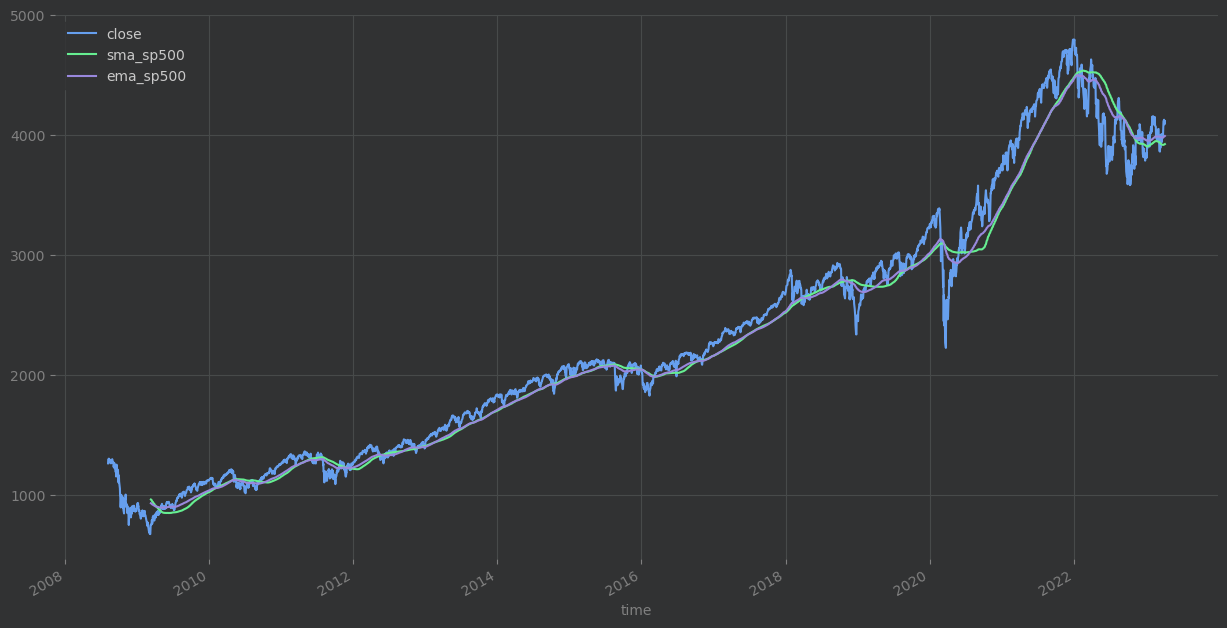

In [21]:
SP500[["close", 'sma_sp500', 'ema_sp500']].plot(figsize=(15,8))

In [22]:
sp500_sma = cf.sma_positiva(SP500['close'])
estadisticas = cf.stats(sp500_sma)

Probabilidad de día alcista, retorno medio diario e incremento acumulado del índice SP500:

In [23]:
print('Estadíscos sin aplicar ninguna condición de tendencia')
print(f"Probabilidad barra alcista diaria: {'%.2f' % estadisticas[0][0]} ")
print(f"retorno medio diario: {'%.2f' % estadisticas[0][1]} ")
print(f"Incremento acumulado: {'%.2f' % estadisticas[0][2]} ")

Estadíscos sin aplicar ninguna condición de tendencia
Probabilidad barra alcista diaria: 54.75 
retorno medio diario: 0.05 
Incremento acumulado: 192.57 


Probabilidad de día alcista, retorno medio diario e incremento acumulado del índice SP500 condicionado a que la sma de 150 días sea positiva (tendencia alcista):

In [24]:
print('Estadíscos SMA=150 condición de tendencia')
print(f"Probabilidad barra alcista diaria: {'%.2f' % estadisticas[1][0]} ")
print(f"retorno medio diario: {'%.2f' % estadisticas[1][1]} ")
print(f"Incremento acumulado: {'%.2f' % estadisticas[1][2]} ")

Estadíscos SMA=150 condición de tendencia
Probabilidad barra alcista diaria: 56.36 
retorno medio diario: 0.08 
Incremento acumulado: 220.94 


Comparación gráfica de retorno acumulado del SP500 y el SP500 con SMA150 positiva:

<Axes: xlabel='time'>

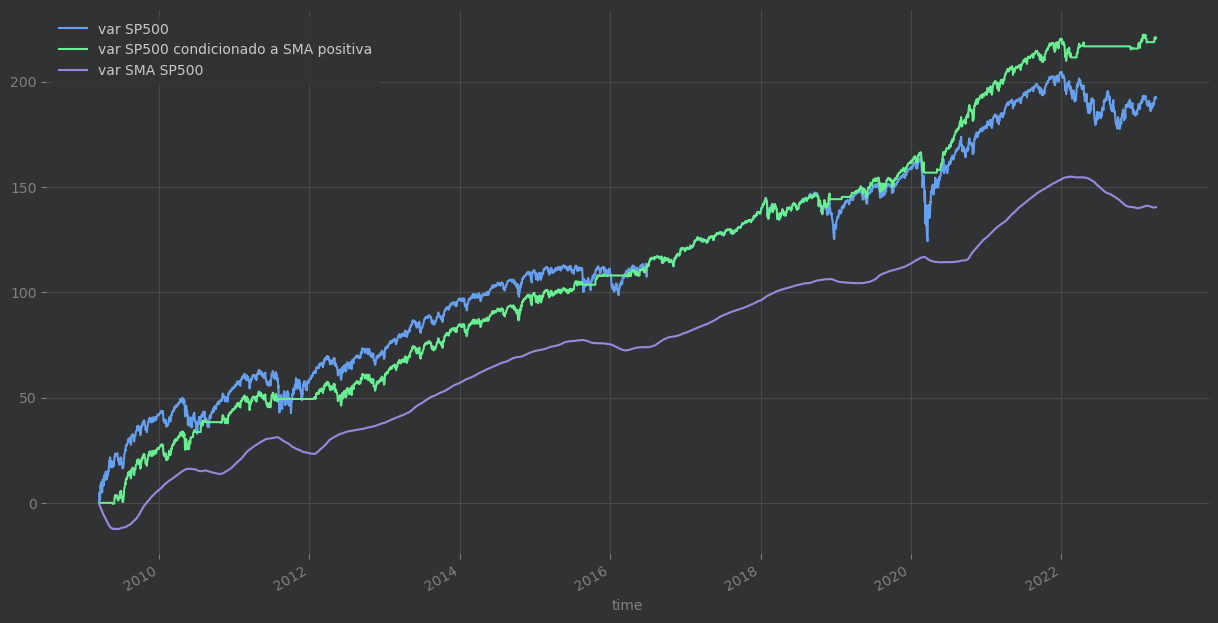

In [25]:
#sp500_sma[["var_close_acum", 'var_close_condicionado_acum', 'var_indicador_acum']].plot(figsize=(15,8))

sp500_sma.rename(columns={"var_close_acum": "var SP500", "var_close_condicionado_acum": "var SP500 condicionado a SMA positiva", "var_indicador_acum": "var SMA SP500"})[["var SP500", "var SP500 condicionado a SMA positiva", "var SMA SP500"]].plot(figsize=(15,8))

Observamos como la probabilidad condicionada a una SMA positiva de encontrar un día alcista incremento un poco respecto a la probabilidad no condicionada, sin embargo no es un incremento muy significativo. Por otro lado el retorno medio diario y y el retorno acumulado si que aumenta significativamente.
- el aumento en el retorno medio nos indica que para una probabilidad de encontrar un día alcista parecedido usando SMA y no usándolo, los días alcistas tienen mayor incremento y los bajistas menor decremento usando la probabilidad condicionada a la SMA alcista.
- el incremento en el retorno aculado nos indica que usando una probabilidad condicionada a una SMA alcista nos protege ante correciones del mercado, por lo que aprovechamos las subidas y limitamos las bajadas del mercado.

¿ y si en vez de usar una media movil simple usamos una media movil exponencial que se adapta rapidamente a los cambios de tendencia?

In [26]:
sp500_ema = cf.ema_positiva(SP500['close'])
estadisticas_ema = cf.stats(sp500_ema)

In [27]:
print('Estadíscos EMA=150 condición de tendencia')
print(f"Probabilidad barra alcista diaria: {'%.2f' % estadisticas_ema[1][0]} ")
print(f"retorno medio diario: {'%.2f' % estadisticas_ema[1][1]} ")
print(f"Incremento acumulado: {'%.2f' % estadisticas_ema[1][2]} ")

Estadíscos EMA=150 condición de tendencia
Probabilidad barra alcista diaria: 57.59 
retorno medio diario: 0.11 
Incremento acumulado: 343.55 


Comparación gráfica de retorno acumulado del SP500 y el SP500 con EMA150 positiva:

<Axes: xlabel='time'>

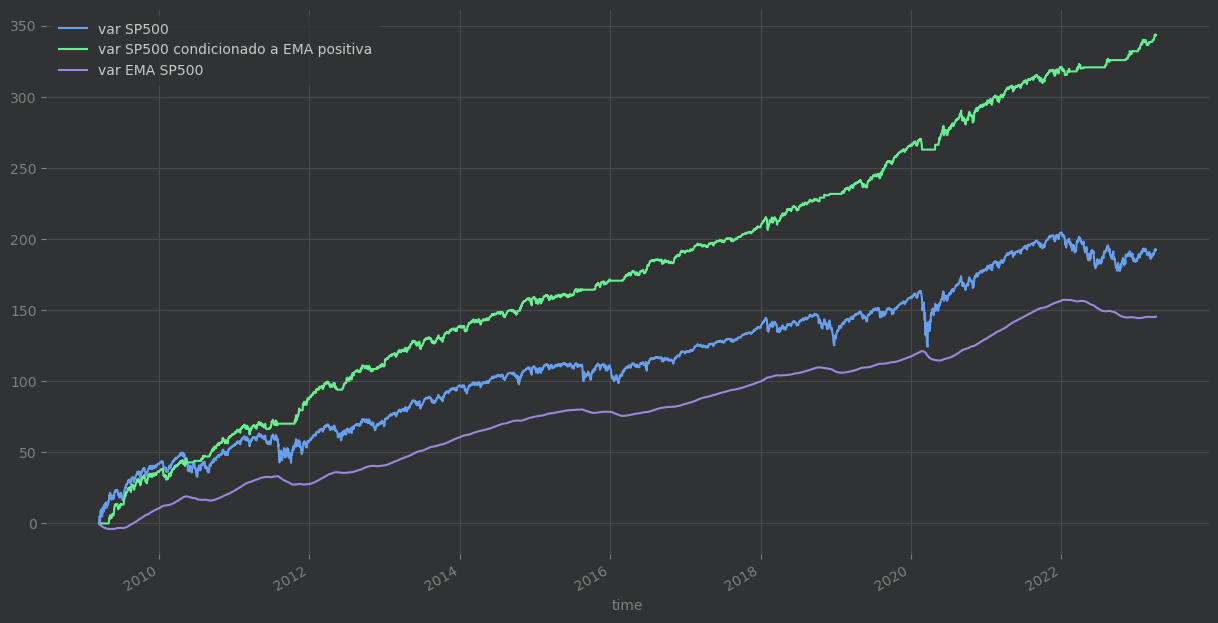

In [28]:
sp500_ema.rename(columns={"var_close_acum": "var SP500", "var_close_condicionado_acum": "var SP500 condicionado a EMA positiva", "var_indicador_acum": "var EMA SP500"})[["var SP500", "var SP500 condicionado a EMA positiva", "var EMA SP500"]].plot(figsize=(15,8))

Observamos como la probabilidad condicionada a una EMA positiva de encontrar un día alcista incrementa respecto a la SMA, sin embargo no es un incremento muy significativo. Por otro lado el retorno medio diario y y el retorno acumulado si que aumenta significativamente repecto a una SMA. Concluimos:
- La EMA captura más rapido los cambios de tendencias y esto permite mejorar los estadísticos estudiados.
- La probabilidad de invertir un día cualquiera y que sea alcista incremento un poco cuando estamos en una tendencia alcista.
- invertir a favor de la tendencia limita las pérdidas ante posibles correciones del mercado.
- los retornos meidos de días alcistas son mayores cuando estamos en una tendencia alcista.
- las pérdidas medias de un día bajista son menores cuando estamos ante una tendencia alcista.

### Análisis en Time Frame 1 Hora

Hasta ahora hemos estudiado la tendencia en time frame diario, pero ¿cómo afectará en time frames inferiores? ¿la tendencia diaria tiene efecto sobre la probabilidad alcista en time frames horarios o de minutos?

In [29]:
SP500_H1 = MT5.get_data('SPX500',10000*8, mt5.TIMEFRAME_H1)
# creamos medial movil simple de 150 periodos con la librerria TA
sma = ta.trend.SMAIndicator(close=SP500_H1['close'], window=60)
SP500_H1['sma_sp500'] = sma.sma_indicator()
# creamos medial movil exponencial de 150 periodos con la librerria TA
ema = ta.trend.EMAIndicator(close=SP500_H1['close'], window=60)
SP500_H1['ema_sp500'] = ema.ema_indicator()

<Axes: xlabel='time'>

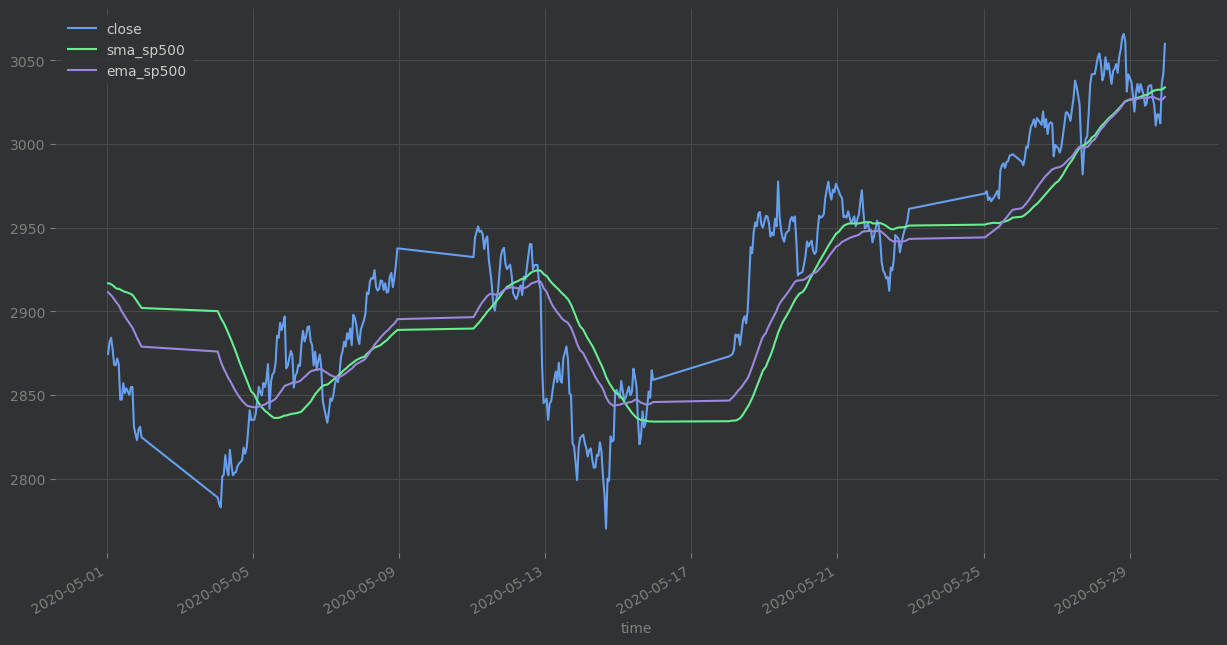

In [30]:
SP500_H1[["close", 'sma_sp500', 'ema_sp500']].loc['2020-05-01':'2020-05-31'].plot(figsize=(15,8))

El mejor horario para operar el S&P 500 es durante las horas principales del mercado (09:30 a 16:30 hora local) en la Bolsa de Nueva York y el NASDAQ. Durante estas horas, el mercado ofrece mayor liquidez y diferenciales más ajustados. Por ello ajustaremos nuestros datos a este horario pues es en el que operaremos con los sistemas de trading algorítmico que diseñaremos más adelante. La plataforma Metatrader usa time zone UTC que es 4 horas mas tarde que en nueva york, por lo que la hora de apertura y cierre en UTC será: 13:30 - 19:30

In [31]:
# Obtenemos datos SP500 Time Frame = horario
print('Estadísticos barras horarias condicionadas a tendencia alcista en TF diario ')
print(f"Probabilidad barra alcista diaria: {'%.2f' % estadisticas_1H_cond_EMA1D[0][0]} %")
print(f"retorno medio diario: {'%.4f' % estadisticas_1H_cond_EMA1D[0][1]} %")
print(f"Incremento acumulado: {'%.2f' % estadisticas_1H_cond_EMA1D[0][2]} %")print('Estadísticos barras horarias condicionadas a tendencia alcista en TF diario ')
print(f"Probabilidad barra alcista diaria: {'%.2f' % estadisticas_1H_cond_EMA1D[0][0]} %")
print(f"retorno medio diario: {'%.4f' % estadisticas_1H_cond_EMA1D[0][1]} %")
print(f"Incremento acumulado: {'%.2f' % estadisticas_1H_cond_EMA1D[0][2]} %") = MT5.get_data_multi_index('SPX500',10000*8, mt5.TIMEFRAME_H1)

<Axes: xlabel='time,date,year,month,day,hour,minute,secods,miliseconds'>

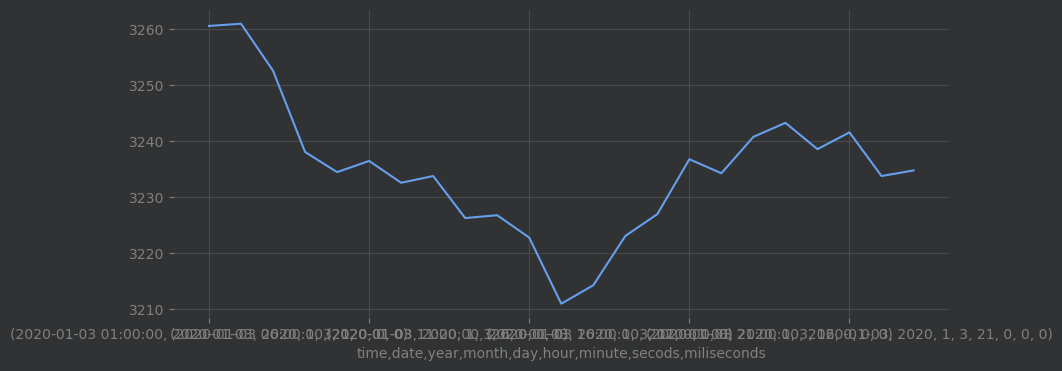

In [32]:
# Comprobamos que tenemos un precio de cierre por cada hora
SP500_H1['close'].loc[('2020-01-03')].plot(figsize=(10,4))

Analizamos la probabilidad de encontrar una barra horaria alcista en 2020

In [101]:
SP500_H1 = MT5.get_data_multi_index('SPX500',10000*8, mt5.TIMEFRAME_H1)
SP500_H1 = SP500_H1.loc[(slice('2019', '2021')), :]
sp500_H1_ema = cf.ema_positiva(SP500_H1['close'], window = 60)
sp500_H1_ema_2020 = sp500_H1_ema.loc['2020']
estadisticas_1H = cf.stats(sp500_H1_ema_2020)

print('Estadísticos barras horarias')
print(f"Probabilidad barra alcista diaria: {'%.2f' % estadisticas_1H[0][0]} %")
print(f"retorno medio diario: {'%.4f' % estadisticas_1H[0][1]} %")
print(f"Incremento acumulado: {'%.2f' % estadisticas_1H[0][2]} %")

Estadísticos barras horarias
Probabilidad barra alcista diaria: 52.82 %
retorno medio diario: 0.0034 %
Incremento acumulado: 20.28 %


<Axes: xlabel='time,date,year,month,day,hour,minute,secods,miliseconds'>

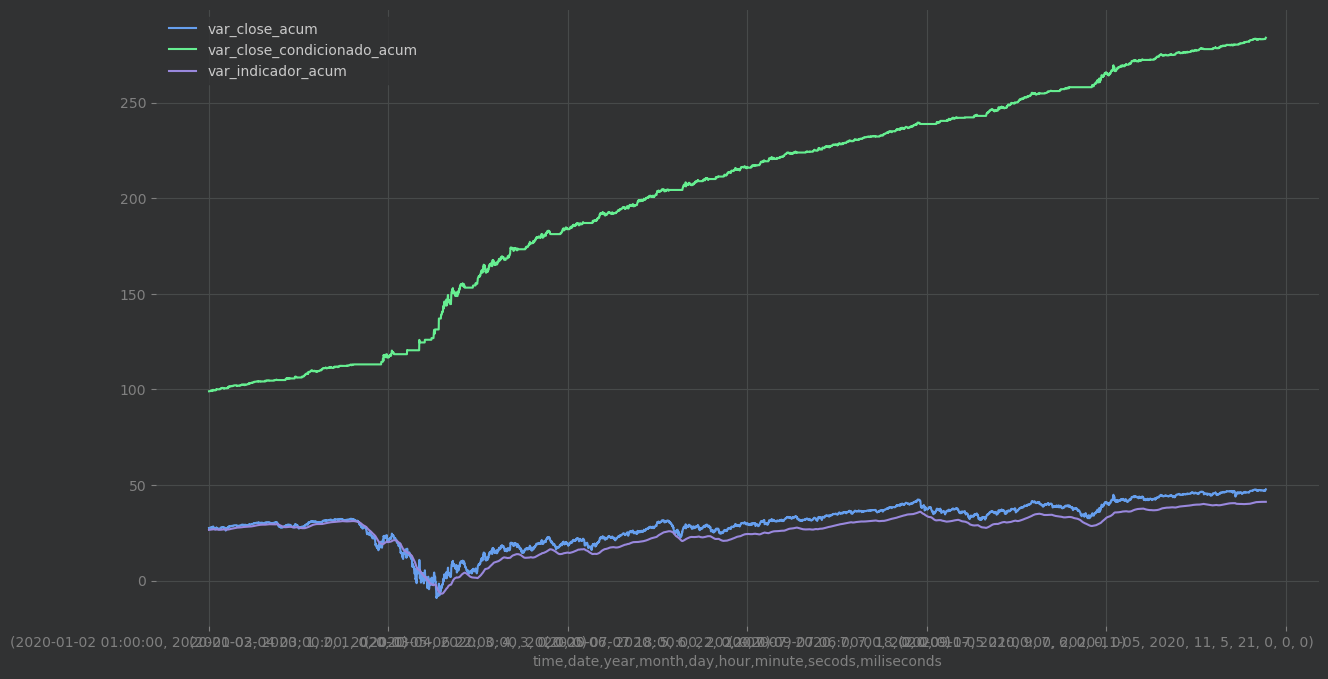

In [102]:
sp500_H1_ema_2020.loc['2020',['var_close_acum','var_close_condicionado_acum','var_indicador_acum']].plot(figsize=(15,8))

Comprobemos como influye la **tendencia diaria** sobre la probabilidad alcista horaria


In [52]:
# Probabilidad alcista condicionada a EMA diaria alcista
# Estrategia EMA diaria sobre TF horario
SP500_H1 = MT5.get_data_multi_index('SPX500',10000*8, mt5.TIMEFRAME_H1)
sp500_1D = MT5.get_data_multi_index('SPX500',10000, mt5.TIMEFRAME_D1)
sp500_ema = cf.ema_positiva(sp500_1D['close'])

#filtramos el resultado a los dias donde se cumple la condición
sp500_ema_trues = sp500_ema.loc[sp500_ema['condicion'] == True, 'condicion']

# Obtenemos la lista de los días donde se cumple la condicion en formato date (pos 1)
dias_alcistas = sp500_ema_trues.index
dias_alcistas = [tupla[1] for tupla in dias_alcistas]

# filtramos SP500_H1 con los dias alcista de la estrategia diaria
SP500_H1_filtered = SP500_H1.loc[(slice(None), dias_alcistas), :]
# sacamos las estadisticas solo para 2020
SP500_H1_filtered = SP500_H1_filtered.loc[:, :, 2020:2020]

# le pasamos el df anterior a la funcon stats agregando una columna var_close y otra condicion=True
SP500_H1_filtered['var_close'] = SP500_H1_filtered["close"].pct_change().mul(100)
SP500_H1_filtered['condicion'] = True
estadisticas_1H_cond_EMA1D = cf.stats(SP500_H1_filtered)

print('Estadísticos barras horarias condicionadas a tendencia alcista en TF diario ')
print(f"Probabilidad barra alcista diaria: {'%.2f' % estadisticas_1H_cond_EMA1D[0][0]} %")
print(f"retorno medio diario: {'%.4f' % estadisticas_1H_cond_EMA1D[0][1]} %")
print(f"Incremento acumulado: {'%.2f' % estadisticas_1H_cond_EMA1D[0][2]} %")

Estadísticos barras horarias condicionadas a tendencia alcista en TF diario 
Probabilidad barra alcista diaria: 53.38 %
retorno medio diario: 0.0036 %
Incremento acumulado: 16.74 %


Comprobemos como influye la **tendencia horaria** sobre la probabilidad alcista horaria.
Analizamos la probabilidad de encontrar una barra horaria alcista con una tendencia positiva horaria. Se modifica el número de periodos de la ema de 150 a 60 porque 150 periodos generaba una EMA muy lenta para detectar los cambios de tendencia horarios.

In [80]:
# ********** estrategia EMA horaria 2020 ************
# calculamos la estrategia
SP500_H1_ema = cf.ema_positiva(SP500_H1['close'], window=60)
# nos quedamos con 2020
SP500_H1_ema_2020 = SP500_H1_ema.loc[:, :, 2020:2020]
# Calculamos los estadíticos
estadisticas_H1_ema_2020 = cf.stats(SP500_H1_ema_2020)
print('Estadíscos probabilidad alcista horaria condicionado a tendencia alcista horaria')
print(f"Probabilidad barra alcista horaria: {'%.2f' % estadisticas_H1_ema_2020[1][0]} ")
print(f"retorno medio horario: {'%.4f' % estadisticas_H1_ema_2020[1][1]} ")
print(f"Incremento acumulado: {'%.2f' % estadisticas_H1_ema_2020[1][2]} ")

Estadíscos probabilidad alcista horaria condicionado a tendencia alcista horaria
Probabilidad barra alcista horaria: 57.73 
retorno medio horario: 0.0495 
Incremento acumulado: 185.04 


<Axes: xlabel='time,date,year,month,day,hour,minute,secods,miliseconds'>

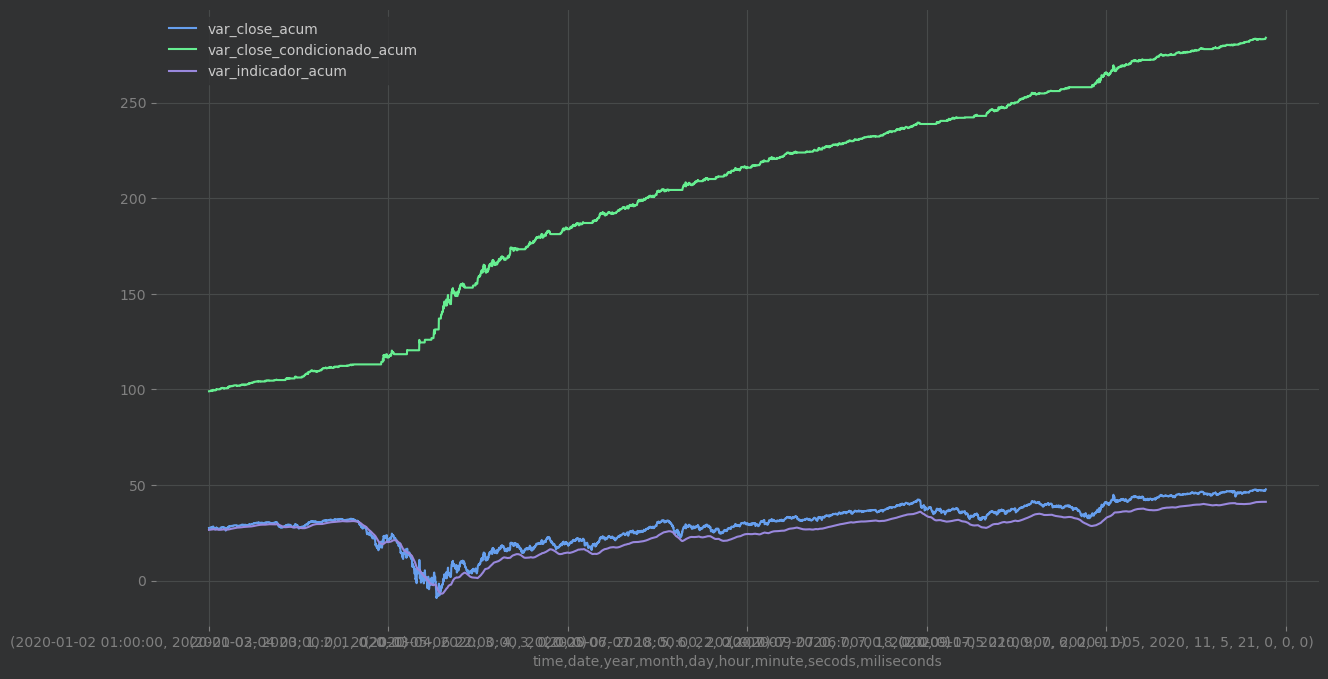

In [100]:
SP500_H1_ema_2020.loc['2020',['var_close_acum','var_close_condicionado_acum','var_indicador_acum']].plot(figsize=(15,8))